In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


### Get dataset for Food Price Analysis

In [2]:
df = pd.read_csv('./food_items.csv').set_index('Updated At')

# Price Variation Analysis Across Regions

- Objective: 
    Analyze the price variation between different regions to identify any significant differences in Nigeria (eg. Lagos vs Abuja vs Kano).

- Hypothesis:

    - Null Hypothesis (H0): There is no significant difference in the prices of food across different regions in Nigeria.
    - Alternative Hypothesis (H1): There is a significant difference in the prices of food across different regions in Nigeria.

- Methodology:
    - Load the dataset using the `load_dataset` function from the `dataset` module.
    - Perform the Anova (Analysis and Variance) test to analyze the variation

- Potential Outcome:
    
    - The outcome of this analysis will provide insights into the price differences between different regions in Nigeria, helping to understand the regional variations in food prices.

In [3]:
price_variation_df = df[['Price (₦)', 'Vendor Location']]

In [4]:
# See the summery statistics of the generated data.
price_variation_df.groupby('Vendor Location').describe()

Price (₦)                                               \
                    count          mean           std    min       25%   
Vendor Location                                                          
Abeokuta           4280.0  48544.965421  39279.266922  100.0  14943.75   
Abuja              6005.0  51544.169026  40969.938802  100.0  15936.00   
Ajah, Lagos        2268.0  46288.385362  43019.297729  100.0  10545.00   
Asaba              4354.0  47481.799495  37056.260348  100.0  14755.50   
Benin City         3803.0  58614.662372  43630.337252  200.0  17518.00   
Calabar            3314.0  48014.451116  38738.038362  100.0  14215.50   
Enugu              2840.0  59678.248944  42216.621300  200.0  22317.00   
Ibadan             4477.0  35167.467054  32027.212151  100.0   9085.00   
Ikeja, Lagos       5161.0  36450.966867  31098.751189  100.0  11097.00   
Jos                4237.0  56164.727637  43984.678708  100.0  16850.00   
Kaduna             5116.0  51234.368647  41080.420893  100.0  15739.50   
Kano               4308.0  44294.088440  39374.073422  100.0  11767.50   
Lekki, Lagos       5608.0  52977.290300  44065.501372  100.0  14268.00   
Makurdi            4194.0  56280.298999  44378.988207  100.0  16111.25   
Ogun State         2663.0  50677.193015  44146.727082  100.0  13354.00   
Onitsha            7755.0  42796.773952  38618.145451  100.0  11803.50   
Owerri             2314.0  46661.268799  39908.439655  100.0  12030.75   
Port Harcourt      2540.0  35799.575984  28089.859375  100.0  10893.75   
Surulere, Lagos    3075.0  42588.112846  38323.746454  100.0  11819.00   
Yaba, Lagos        5056.0  40700.103244  33783.312861  100.0  12369.75   

                                              
                     50%       75%       max  
Vendor Location                               
Abeokuta         40622.5  75750.00  150000.0  
Abuja            43302.0  81930.00  150000.0  
Ajah, Lagos      33194.5  73371.75  150000.0  
Asaba            41494.0  75651.50  150000.0  
Benin City       54789.0  92217.50  150000.0  
Calabar          40973.0  76364.75  150000.0  
Enugu            56614.5  90623.25  150000.0  
Ibadan           28514.0  47523.00  150000.0  
Ikeja, Lagos     30729.0  49314.00  150000.0  
Jos              47258.0  90276.00  150000.0  
Kaduna           42189.0  81156.75  150000.0  
Kano             34575.0  67061.00  150000.0  
Lekki, Lagos     41277.0  86457.75  150000.0  
Makurdi          46257.0  91945.00  150000.0  
Ogun State       37819.0  83692.50  150000.0  
Onitsha          32532.0  62568.00  150000.0  
Owerri           37702.5  74022.00  150000.0  
Port Harcourt    31854.5  53339.50  100000.0  
Surulere, Lagos  32832.0  62893.00  150000.0  
Yaba, Lagos      34308.0  61114.25  150000.0

In [5]:
# Perform anova
regions_prices = [df[df["Vendor Location"] == x]["Price (₦)"] for x in df['Vendor Location'].unique()]
stats.f_oneway(*regions_prices)

F_onewayResult(statistic=138.98288831848492, pvalue=0.0)

Given that the pvalue is below 0.05 we reject the Null Hypothesis and conclude that there is a significant difference in the prices of food across different regions in Nigeria.

# Impact of Seasonal Trends on Food Prices

- Objective: 

    Investigate whether seasonal trends have an impact on food prices in Nigeria. (Dry and Rainy Seasons)

- Hypothesis:

    - Null Hypothesis (H0): There is not significant difference in the price of food in Nigeria between dry and rainy seasons.
    - Alternative Hypothesis (H1): There is a significant difference in price of food in Nigeria between dry and rainy seasons.

- Methodology:

    - Gather time-series data for popular items (eg. rice, maize, beans) from different regions in Nigeria.
    - Perform the paired t-test or Mann-Whitney test to compare seasonal prices.

- Potential Outcome:

    - Seasonal insights can improve the app's price prediction and help users make better cost-effective shopping decisions.

In [6]:
df.index = pd.DatetimeIndex(df.index)

In [7]:
# Set Dry and Rainy seasons
df['Season'] = ['Wet' if x >= 4 and x <= 9 else 'Dry' for x in df.index.month]

<Axes: xlabel='Season', ylabel='Price (₦)'>

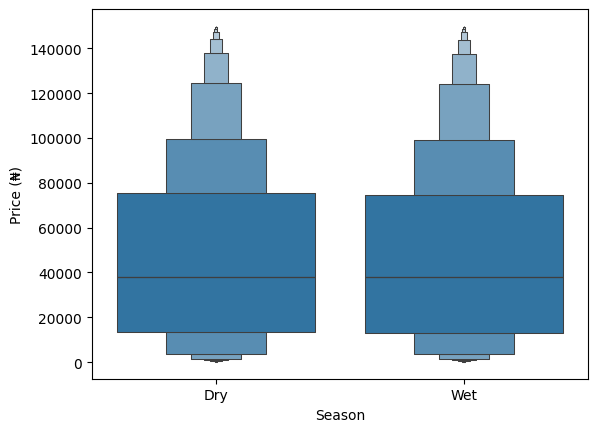

In [8]:
sns.boxenplot(x='Season', y='Price (₦)', data=df)

In [9]:
df.groupby('Season').describe()

Price (₦)                                                       \
           count          mean           std    min      25%      50%   
Season                                                                  
Dry      43013.0  47599.550252  40067.115445  100.0  13552.0  38148.0   
Wet      40355.0  47211.625846  39859.230486  100.0  13207.5  37965.0   

                          Venor Id             ...  Promotion             \
            75%       max    count       mean  ...        75%        max   
Season                                         ...                         
Dry     75546.0  150000.0  43013.0  50.031223  ...  12.343101  14.981033   
Wet     74501.0  150000.0  40355.0  50.034444  ...  11.655462  14.990587   

             Id                                                              \
          count          mean           std  min      25%      50%      75%   
Season                                                                        
Dry     43013.0  41689.791877  24061.559591  0.0  20863.0  41689.0  62521.0   
Wet     40355.0  41676.793706  24071.881240  1.0  20816.5  41679.0  62536.0   

                 
            max  
Season           
Dry     83367.0  
Wet     83366.0  

[2 rows x 40 columns]

In [10]:
t_test, p_value = stats.ttest_ind(df[df["Season"] == "Wet"]["Price (₦)"], df[df["Season"] == "Dry"]["Price (₦)"])
t_test, p_value

(-1.4005496600499894, 0.16135250526386752)

Given that the p_value is less than 0.05, we reject the Null Hypothesis and conclude that there is significant difference in the price of food in Nigeria between dry and rainy seasons.

Decide on the columns that the dataframe will have

- Name
- Price
- Category
- Id
- Vendor Name
- Vendor Id
- Vendor Rating
- Vendor Location
- Unit
- Promotion
- Stock
- Last updated